# 1.1 Standard Scaler

1. Write a Python program to implement Standard Scaler

In [1]:
import numpy as np
import pandas as pd


class StandardNorm:
    def scale(self, df):
        for i in df.columns:
            mean = df[i].mean()
            sd = df[i].std()
            df[i] = (df[i] - mean) / sd
        return df


df = pd.DataFrame(
    [[45000, 42], [32000, 26], [58000, 48], [37000, 32]], columns=["Salary", "Age"]
)
print("Original Data")
print(df)

s = StandardNorm()
df_scaled = s.scale(df)

print("\nScaled Data")
print(df_scaled)

Original Data
   Salary  Age
0   45000   42
1   32000   26
2   58000   48
3   37000   32

Scaled Data
     Salary       Age
0  0.176318  0.506803
1 -0.969750 -1.114967
2  1.322386  1.114967
3 -0.528954 -0.506803


# 1.2 Min-max scaler

2. Write a Python program to implement Min-max Scaler

In [2]:
import numpy as np
import pandas as pd


class MinMaxNorm:
    def scale(self, df):
        for c in df.columns:
            min = df[c].min()
            max = df[c].max()
            df[c] = (df[c] - min) / (max - min)
        return df


df = pd.DataFrame(
    [[45000, 42], [32000, 26], [58000, 48], [37000, 32]], columns=["Salary", "Age"]
)
print("Original Data")
print(df)

s = MinMaxNorm()
df_scaled = s.scale(df)

print("\nScaled Data")
print(df_scaled)

Original Data
   Salary  Age
0   45000   42
1   32000   26
2   58000   48
3   37000   32

Scaled Data
     Salary       Age
0  0.500000  0.727273
1  0.000000  0.000000
2  1.000000  1.000000
3  0.192308  0.272727


# 2.1 K-means clustering

1. Write a Python program to implement K-means Clustering algorithm. <br>
&emsp;Generate 1000 2D data points in the range 0-100 randomly. <br>
&emsp;Divide data points into 3 clusters.

Cluser centers:  [69.00427765 76.70986483] [70.62044459 24.38044043] [20.03717511 48.04890483]


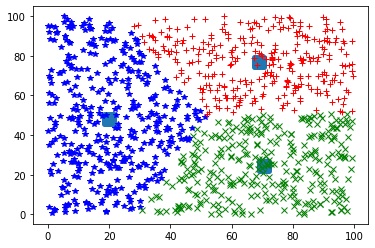

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.random.rand(1000, 2) * 100

km = KMeans(n_clusters=3, init="random")

km.fit(data)

centers = km.cluster_centers_
labels = km.labels_

print("Cluser centers: ", *centers)
# print("Cluser Labels: ", *labels)

colors = ["r", "g", "b"]
markers = ["+", "x", "*"]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], color=colors[labels[i]], marker=markers[labels[i]])
plt.scatter(centers[:, 0], centers[:, 1], marker="s", s=100, linewidths=5)
plt.show()

# 2.2 K-means++ clustering

2. Write a Python program to implement K-means++ Clustering algorithm. <br>
&emsp;Generate 1000 2D data points in the range 0-200 randomly. <br>
&emsp;Divide data points into 4 clusters.

Cluser centers:  [149.84988926  48.45735275] [ 49.86238183 151.59163234] [55.0320991  49.91663519] [144.96502525 151.80352045]


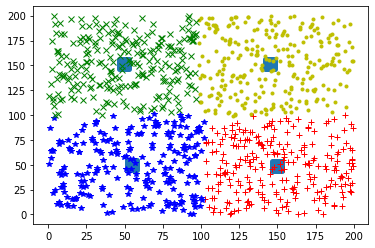

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.random.rand(1000, 2) * 200

km = KMeans(n_clusters=4, init="k-means++")

km.fit(data)

centers = km.cluster_centers_
labels = km.labels_

print("Cluser centers: ", *centers)
# print("Cluser Labels: ", *labels)

colors = ["r", "g", "b", "y"]
markers = ["+", "x", "*", "."]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], color=colors[labels[i]], marker=markers[labels[i]])
plt.scatter(centers[:, 0], centers[:, 1], marker="s", s=100, linewidths=5)
plt.show()

# 3.1 K-means Clustering

1. Write a Python program to implement K-means Clustering algorithm. <br>
&emsp;Generate 10000 2D data points in the range 0-100 randomly. <br>
&emsp;Divide data points into 5 clusters.<br>
&emsp;Find time taken by the algorithm to find clusters.<br>

Total Time: 0.859375
Cluster Centers: [[24.75092479 76.18202085]
 [74.95770536 76.31237726]
 [15.76193527 26.71298897]
 [84.14572431 27.64304157]
 [50.1416164  26.58749603]]


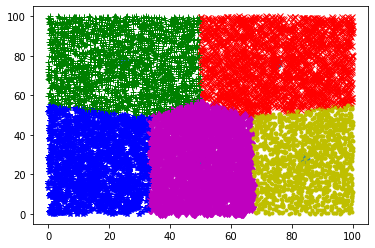

In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.random.rand(10000, 2) * 100

km = KMeans(n_clusters=5, init="random")

t0 = time.process_time()
km.fit(data)
t1 = time.process_time()

tt = t1 - t0
print("Total Time:", tt)

centers = km.cluster_centers_
labels = km.labels_

print("Cluster Centers:", centers)
# print("Cluster Labels:", *labels)

colors = ["g", "r", "b", "y", "m"]
markers = ["+", "x", "*", ".", "d"]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], color=colors[labels[i]], marker=markers[labels[i]])
plt.scatter(centers[:, 0], centers[:, 1], marker="o", s=50, linewidths=5)
plt.show()

# 3.2 Mini-Batch K-means Clustering

2. Write a Python program to implement Mini-batch K-means Clustering algorithm. <br>
&emsp;Generate 10000 2D data points in the range 0-100 randomly. <br>
&emsp;Divide data points into 5 clusters.<br>
&emsp;Find time taken by the algorithm to find clusters.<br>
&emsp;Vary the batch size from 100 to 1500, find time taken by the algorithm in each case and find best value of the batch size.

C:\Users\Tirtha Raj Poudel\miniconda3\envs\test_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


Total Time:  0.3155672550201416
Cluster Centers: [[71.60844294 18.24470869]
 [21.28126715 73.60137663]
 [23.66927609 24.79247076]
 [67.68171442 84.73901063]
 [77.10017603 53.80019715]]


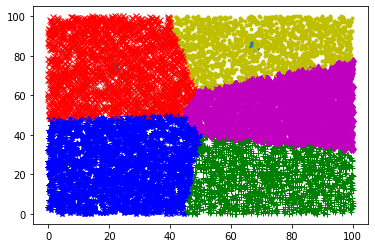

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

data = np.random.rand(10000, 2) * 100

mbk = MiniBatchKMeans(n_clusters=5, init="random", batch_size=500)

t0 = time.time()
mbk.fit(data)
t1 = time.time()

tt = t1 - t0
print("Total Time: ", tt)

centers = mbk.cluster_centers_
labels = mbk.labels_

print("Cluster Centers:", centers)
# print("Labels:", labels)

colors = ["g", "r", "b", "y", "m"]
markers = ["+", "x", "*", ".", "d"]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], color=colors[labels[i]], marker=markers[labels[i]])
plt.scatter(centers[:, 0], centers[:, 1], marker="o", s=50, linewidths=5)
plt.show()

# 4. KMedoids Clustering and Agglomerative Clustering

1. Write a Python program to find clusters of Iris Dataset using KMedoids Clustering Algorithm. <br>
2. Write a Python program to find clusters of Iris Dataset using Agglomerative Clustering Algorithm. <br>
Compare them in terms of different performance measures. <br>

# 4.1 KMedoids Clustering

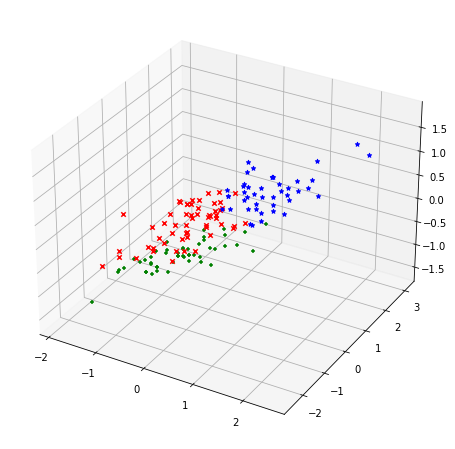

Rand Index: 0.8367785234899329
Homogeniety Score: 0.6672491406379297
Completeness Score: 0.6701843437329579
Silhouette Coefficient: 0.4590416105554613


In [7]:
# !pip install scikit-learn-extra

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn import metrics
import matplotlib.pyplot as plt

iris_data = load_iris()

x = iris_data.data
y = iris_data.target

# print(x[:5])
# print(y[:5])

sc = StandardScaler().fit(x)

sx = sc.transform(x)

km = KMedoids(n_clusters=3)
km.fit(sx)

py = km.fit_predict(sx)
# print("Predicted: ", py)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

colors = ["g", "r", "b"]
markers = ["+", "x", "*"]

for i in range(len(sx)):
    ax.scatter(sx[i][0], sx[i][1], sx[i][2], color=colors[py[i]], marker=markers[py[i]])
plt.show()

ri = metrics.rand_score(y, py)
print("Rand Index:", ri)

hs = metrics.homogeneity_score(y, py)
print("Homogeniety Score:", hs)

cs = metrics.completeness_score(y, py)
print("Completeness Score:", cs)

sc = metrics.silhouette_score(sx, py, metric="euclidean")
print("Silhouette Coefficient:", sc)

# 4.2 Agglomerative Clustering

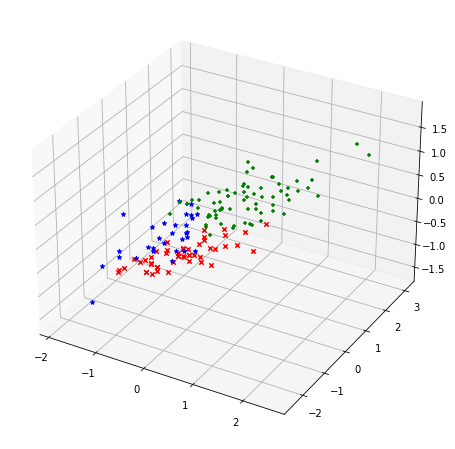

Rand Index: 0.8252348993288591
Homogeniety Score: 0.6578818079976051
Completeness Score: 0.6940248415952218
Silhouette Coefficient: 0.4466890410285909


In [8]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.pyplot as plt

iris_data = load_iris()

x = iris_data.data
y = iris_data.target

# print(x[:5])
# print(y[:5])

sc = StandardScaler().fit(x)

sx = sc.transform(x)

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(sx)

py = ac.fit_predict(sx)
# print("Predicted: ", py)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

colors = ["g", "r", "b"]
markers = ["+", "x", "*"]

for i in range(len(sx)):
    ax.scatter(sx[i][0], sx[i][1], sx[i][2], color=colors[py[i]], marker=markers[py[i]])
plt.show()

ri = metrics.rand_score(y, py)
print("Rand Index:", ri)

hs = metrics.homogeneity_score(y, py)
print("Homogeniety Score:", hs)

cs = metrics.completeness_score(y, py)
print("Completeness Score:", cs)

sc = metrics.silhouette_score(sx, py, metric="euclidean")
print("Silhouette Coefficient:", sc)

# 5. Naive Bayes Classifier and ID3 Decision Tree Classifier
1. Write a Python program to predict diabeties using Naive Bayes Classification.<br>
2. Write a Python program to predict diabeties using ID3 Decision Tree Classifier.<br>
Compare the performance of both classifiers.

# 5.1 Naive Bayes Classifier

In [9]:
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

dataset = pd.read_csv("Diabetes.csv")

print("Dataset Size: ", len(dataset))

split = int(len(dataset) * 0.7)
train, test = dataset.iloc[:split], dataset.iloc[split:]

p = train["Pragnency"].values
g = train["Glucose"].values
bp = train["Blod Pressure"].values
st = train["Skin Thikness"].values
ins = train["Insulin"].values
bmi = train["BMI"].values
dpf = train["DFP"].values
a = train["Age"].values
d = train["Diabetes"].values

trainfeatures = zip(p, g, bp, st, ins, bmi, dpf, a)
traininput = list(trainfeatures)
# print(traininput)

model = GaussianNB()
model.fit(traininput, d)

p = test["Pragnency"].values
g = test["Glucose"].values
bp = test["Blod Pressure"].values
st = test["Skin Thikness"].values
ins = test["Insulin"].values
bmi = test["BMI"].values
dpf = test["DFP"].values
a = test["Age"].values
d = test["Diabetes"].values

testfeatures = zip(p, g, bp, st, ins, bmi, dpf, a)
testinput = list(testfeatures)

predicted = model.predict(testinput)
# print('Actual Class:', *d)
# print('Predicted Class:', *predicted)

print("Confusion Matrix:")
print(metrics.confusion_matrix(d, predicted))

print("\nClassification Measures:")
print("Accuracy:", metrics.accuracy_score(d, predicted))
print("Recall:", metrics.recall_score(d, predicted))
print("Precision:", metrics.precision_score(d, predicted))
print("F1-score:", metrics.f1_score(d, predicted))

Dataset Size:  767
Confusion Matrix:
[[128  24]
 [ 30  49]]

Classification Measures:
Accuracy: 0.7662337662337663
Recall: 0.620253164556962
Precision: 0.6712328767123288
F1-score: 0.6447368421052632


# 5.2 ID3 Decision Tree Classifier

In [10]:
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

dataset = pd.read_csv("Diabetes.csv")

print("Dataset Size: ", len(dataset))

split = int(len(dataset) * 0.7)
train, test = dataset.iloc[:split], dataset.iloc[split:]

p = train["Pragnency"].values
g = train["Glucose"].values
bp = train["Blod Pressure"].values
st = train["Skin Thikness"].values
ins = train["Insulin"].values
bmi = train["BMI"].values
dpf = train["DFP"].values
a = train["Age"].values
d = train["Diabetes"].values

trainfeatures = zip(p, g, bp, st, ins, bmi, dpf, a)
traininput = list(trainfeatures)
# print(traininput)

model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(traininput, d)

p = test["Pragnency"].values
g = test["Glucose"].values
bp = test["Blod Pressure"].values
st = test["Skin Thikness"].values
ins = test["Insulin"].values
bmi = test["BMI"].values
dpf = test["DFP"].values
a = test["Age"].values
d = test["Diabetes"].values

testfeatures = zip(p, g, bp, st, ins, bmi, dpf, a)
testinput = list(testfeatures)

predicted = model.predict(testinput)
# print('Actual Class:', *d)
# print('Predicted Class:', *predicted)

print("Confusion Matrix:")
print(metrics.confusion_matrix(d, predicted))

print("\nClassification Measures:")
print("Accuracy:", metrics.accuracy_score(d, predicted))
print("Recall:", metrics.recall_score(d, predicted))
print("Precision:", metrics.precision_score(d, predicted))
print("F1-score:", metrics.f1_score(d, predicted))

Dataset Size:  767
Confusion Matrix:
[[118  34]
 [ 17  62]]

Classification Measures:
Accuracy: 0.7792207792207793
Recall: 0.7848101265822784
Precision: 0.6458333333333334
F1-score: 0.7085714285714286


# 6. Support Vector Machine and Multilayer Perceptron
1. Write a Python program to classify breast cancer data using support vector machine.<br>
2. Write a Python program to predict breast cancer data using multilayer perceptron.<br>
Compare the performance of both classifiers.

# 6.1 Support Vector Machine

In [11]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import metrics

cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target
print("Length of Data:", len(cancer.data))

split = int(len(x) * 0.7)
trainx, testx = x[:split], x[split:]
trainy, testy = y[:split], y[split:]

print("Number of features: ", len(cancer.feature_names))
# print("Features: ", *cancer.feature_names)
print("Number of classes: ", len(cancer.target_names))
print("Class Labels: ", cancer.target_names)

model = SVC(kernel="linear")  # Linear Kernel
model.fit(trainx, trainy)
yp = model.predict(testx)

# print("Actual Class: ", *testy)
# print("Predicted Class: ", *yp)

print("\nConfusion Matrix:")
print(metrics.confusion_matrix(testy, yp))

print("\nClassification Measures:")
print("Accuracy:", metrics.accuracy_score(testy, yp))
print("Recall:", metrics.recall_score(testy, yp))
print("Precision:", metrics.precision_score(testy, yp))
print("F1-score:", metrics.f1_score(testy, yp))

Length of Data: 569
Number of features:  30
Number of classes:  2
Class Labels:  ['malignant' 'benign']

Confusion Matrix:
[[ 39   0]
 [  9 123]]

Classification Measures:
Accuracy: 0.9473684210526315
Recall: 0.9318181818181818
Precision: 1.0
F1-score: 0.9647058823529412


# 6.2 Multilayer Perceptron

In [12]:
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
import numpy as np

cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target

split = int(len(x) * 0.7)
trainx, testx = x[:split], x[split:]
trainy, testy = y[:split], y[split:]

print("Number of features: ", len(cancer.feature_names))
# print("Features: ", *cancer.feature_names)
print("Number of classes: ", len(cancer.target_names))
print("Class Labels: ", cancer.target_names)

# Define the keras model
model = Sequential()
model.add(Dense(128, input_dim=30, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile and fit the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(trainx, trainy, epochs=200, batch_size=16, verbose=0)

# Make class predictions with the model
yp = model.predict(testx)

pred = []
for x in yp:
    pred.append(np.round(x))
pred = np.array(pred)
pred = pred.ravel()
pred = pred.astype(int)

# print("Actual Class: ", *testy)
# print("Predicted Class: ", *yp)

print("\nConfusion Matrix:")
print(metrics.confusion_matrix(testy, pred))

print("\nClassification Measures:")
print("Accuracy:", metrics.accuracy_score(testy, pred))
print("Recall:", metrics.recall_score(testy, pred))
print("Precision:", metrics.precision_score(testy, pred))
print("F1-score:", metrics.f1_score(testy, pred))

Number of features:  30
Number of classes:  2
Class Labels:  ['malignant' 'benign']

Confusion Matrix:
[[ 36   3]
 [  2 130]]

Classification Measures:
Accuracy: 0.9707602339181286
Recall: 0.9848484848484849
Precision: 0.9774436090225563
F1-score: 0.981132075471698


# 7. Multi-class Classification Using MLP

In [13]:
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

dataset = pd.read_csv("iris.csv")
dataset = dataset.values
dataset = shuffle(dataset)

x = dataset[:, 0:4].astype(float)
y = dataset[:, 4]

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
ey = encoder.transform(y)

# Convert integers to dummy variables (i.e. one hot encoded)
# print(*y)
# print(*ey)
dy = np_utils.to_categorical(ey)

# Normalize input attributes
sc = StandardScaler().fit(x)
sx = sc.transform(x)

# Train/Test split
split = int(len(x) * 0.7)
trainx, testx = sx[:split], sx[split:]
trainy, testy = dy[:split], dy[split:]

# Define the keras model
model = Sequential()
model.add(Dense(64, input_dim=4, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(units=3, activation="softmax"))

# Compile and fit the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(trainx, trainy, epochs=20, batch_size=8, verbose=0)

# Make class predictions with the model
yp = model.predict(testx)
yp = np.argmax(yp, axis=-1)
yp = yp.ravel()

a = list()
for i in range(len(testy)):
    d = np.argmax(testy[i])
    a.append(d)
a = np.array(a)
al = encoder.inverse_transform(a)
pl = encoder.inverse_transform(yp)

# print('Actual Class: ', *al)
# print('Predicted Class: ', *pl)

print(classification_report(al, pl))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.92      0.79      0.85        14

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.91      0.91      0.91        45



# 8. Apriori Algorithm

In [14]:
# !pip install apyori

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

dataset = pd.read_csv("store_data.csv", header=None)
# print(dataset)

records = []
for i in range(0, 7501):
    test = []
    data = dataset.iloc[i]
    data = data.dropna()
    for j in range(0, len(data)):
        test.append(str(dataset.values[i, j]))
    records.append(test)
# print(records)

association_rules = apriori(
    records, min_support=0.005, min_confidence=0.2, min_lift=3, min_length=2
)
association_results = list(association_rules)

for item in association_results:
    # print(item)
    # print(item[2])
    # print(item[2][0])
    print(list(item[2][0][0]), '->', list(item[2][0][1]))

['mushroom cream sauce'] -> ['escalope']
['pasta'] -> ['escalope']
['herb & pepper'] -> ['ground beef']
['tomato sauce'] -> ['ground beef']
['whole wheat pasta'] -> ['olive oil']
['pasta'] -> ['shrimp']
['frozen vegetables', 'chocolate'] -> ['shrimp']
['spaghetti', 'frozen vegetables'] -> ['ground beef']
['mineral water', 'shrimp'] -> ['frozen vegetables']
['spaghetti', 'frozen vegetables'] -> ['olive oil']
['spaghetti', 'frozen vegetables'] -> ['shrimp']
['spaghetti', 'frozen vegetables'] -> ['tomatoes']
['spaghetti', 'grated cheese'] -> ['ground beef']
['herb & pepper', 'mineral water'] -> ['ground beef']
['spaghetti', 'herb & pepper'] -> ['ground beef']
['ground beef', 'shrimp'] -> ['spaghetti']
['spaghetti', 'milk'] -> ['olive oil']
['mineral water', 'soup'] -> ['olive oil']
['pancakes', 'spaghetti'] -> ['olive oil']
